<a href="https://colab.research.google.com/github/0103IT171043/GRIP-MARCH-21/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 2 - PREDICTION USING -UNSUPERVISED ML**

In [2]:
# Importing Required Libraries and Datasets
import pandas as p
import numpy as n
import matplotlib.pyplot as pl
%matplotlib inline
from sklearn import datasets

In [4]:
# Reading and loading the IRIS Dataset
iris = datasets.load_iris()
i_d= pd.DataFrame(iris.data, columns = iris.feature_names)
print(i_d.shape)
i_d.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now I have decided to use K_Means Clustering procedure to predict the optimum number of clusters. But first let's visualize the data so that an approximate number of classifications can be assumed.

In [5]:
# Predicting the Optimum Number of Clusters by K-Means Classification
from sklearn.cluster import KMeans
X = i_d.iloc[:, [0, 1, 2, 3]].values

In [6]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
y_kmeans = kmeans.predict(X)

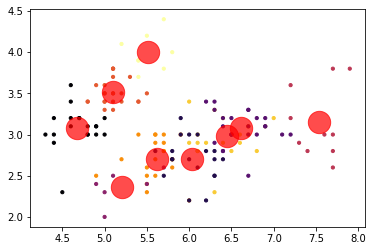

In [9]:
# Plotting the Dataset for Better Observation
pl.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='inferno')

centers = kmeans.cluster_centers_
pl.scatter(centers[:,0], centers[:,1], c='red', s=500, alpha=0.7);

In [10]:
# Predicting the Optimum Number of Clusters using Elbow Method
kmeans.inertia_

27.93350908397476

In [11]:
sse_ = []      #within-cluster Sums of Squared Error
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, kmeans.inertia_])

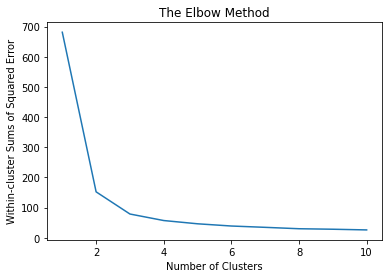

In [12]:
#Plotting the Results of this Method to Observe the "Elbow(s)" in a Line Graph
pl.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
pl.title('The Elbow Method')
pl.xlabel('Number of Clusters')
pl.ylabel('Within-cluster Sums of Squared Error')
pl.show()


In [13]:
#Predicting the Optimum Number of Clusters using Silhouette Analysis
from sklearn.metrics import silhouette_score

In [14]:
sse_ = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])

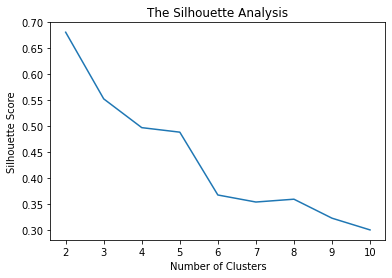

In [15]:
#Plotting the Results of this Analysis Procedure for Better Understanding
pl.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
pl.title('The Silhouette Analysis')
pl.xlabel('Number of Clusters')
pl.ylabel('Silhouette Score')
pl.show()

In [16]:
#Applying K_Means Classifier to the IRIS Dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

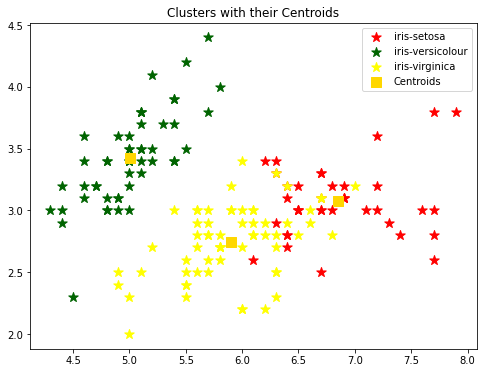

In [17]:
#Representing the Clusters for Visualization
pl.figure(figsize=(8,6))
pl.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, marker='*', c = 'red', label = 'iris-setosa')
pl.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, marker='*', c = 'darkgreen', label = 'iris-versicolour')
pl.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, marker='*', c = 'yellow', label = 'iris-virginica')


#Plotting the Respective Centroids of the Clusters
pl.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, marker=',', c='gold', label = 'Centroids')
pl.legend()
pl.title('Clusters with their Centroids');